# PREDICTING PRICE OF PRE-OWNED CARS 

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Setting dimensions for plot
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
# Reading CSV file
cars_data=pd.read_csv(r"C:\Users\user\Documents\projects\MSc projects (CURAJ)\car-price_prediction\cars_sampled.csv")

In [4]:
# Creating copy
cars=cars_data.copy()

In [5]:
# Structure of the dataset
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [6]:
# Summarizing data
cars.describe()
pd.set_option('display.float_format', lambda x: '%.3f' % x)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [7]:
# To display maximum set of columns
pd.set_option('display.max_columns', 500)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [8]:
# Dropping unwanted columns
col=['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars=cars.drop(columns=col, axis=1)

In [9]:
# Removing duplicate records
cars.drop_duplicates(keep='first',inplace=True)
## 470 duplicate records

# Data cleaning

In [10]:
# No. of missing values in each column
cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

In [20]:
# Variable yearOfRegistration
yearwise_count=cars['yearOfRegistration'].value_counts().sort_index()
yearwise_count

1000     6
1255     1
1500     2
1910    14
1928     1
        ..
7500     1
7800     1
8500     1
8888     2
9999     7
Name: yearOfRegistration, Length: 97, dtype: int64

<AxesSubplot:xlabel='yearOfRegistration', ylabel='price'>

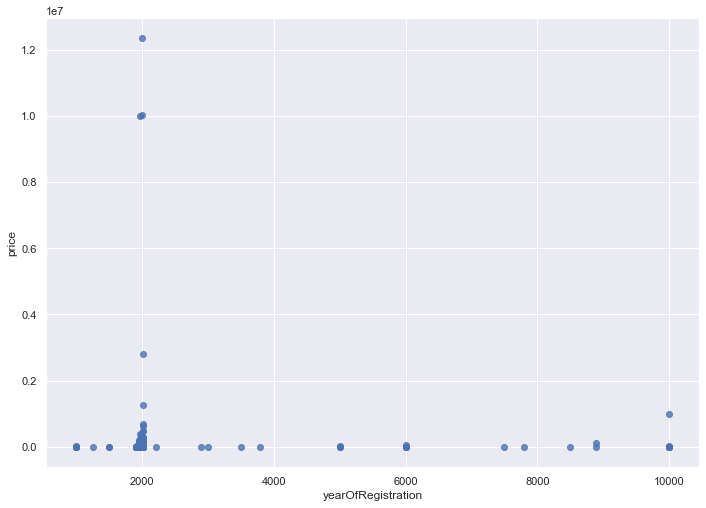

In [21]:
sns.regplot(x='yearOfRegistration', y='price', scatter=True, fit_reg=False, data=cars)

In [22]:
sum(cars['yearOfRegistration'] > 2018)

26

In [23]:
sum(cars['yearOfRegistration'] < 1950)

38

Working range- 1950 and 2018

In [24]:
# Variable price
price_count=cars['price'].value_counts().sort_index()
price_count

0           1415
1            172
2              1
3              1
5              4
            ... 
1250000        1
2795000        1
9999999        1
10010011       1
12345678       1
Name: price, Length: 2393, dtype: int64

In [25]:
cars['price'].describe()

count      49531.000
mean        6567.220
std        86222.378
min            0.000
25%         1150.000
50%         2950.000
75%         7100.000
max     12345678.000
Name: price, dtype: float64

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

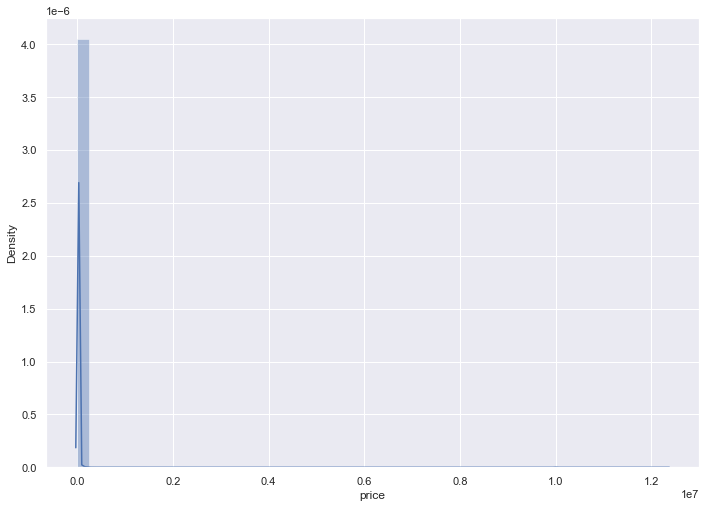

In [26]:
sns.distplot(cars['price'])

<AxesSubplot:ylabel='price'>

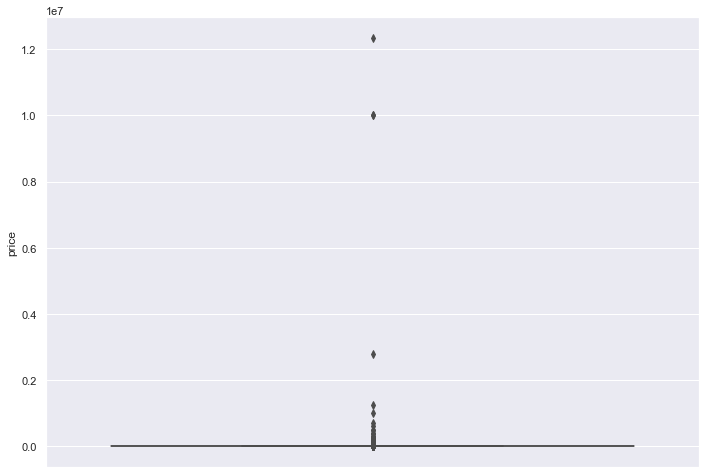

In [27]:
sns.boxplot(y=cars['price'])

In [28]:
sum(cars['price'] > 150000)

34

In [29]:
sum(cars['price'] < 100)

1748

Working range- 100-150000

In [30]:
# Variable powerPS
power_count=cars['powerPS'].value_counts().sort_index()
power_count

0        5533
1           3
2           2
3           2
4           4
         ... 
15033       1
16011       1
16312       1
19211       1
19312       1
Name: powerPS, Length: 460, dtype: int64

In [31]:
cars['powerPS'].describe()

count   49531.000
mean      116.501
std       231.536
min         0.000
25%        69.000
50%       105.000
75%       150.000
max     19312.000
Name: powerPS, dtype: float64

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='powerPS', ylabel='Density'>

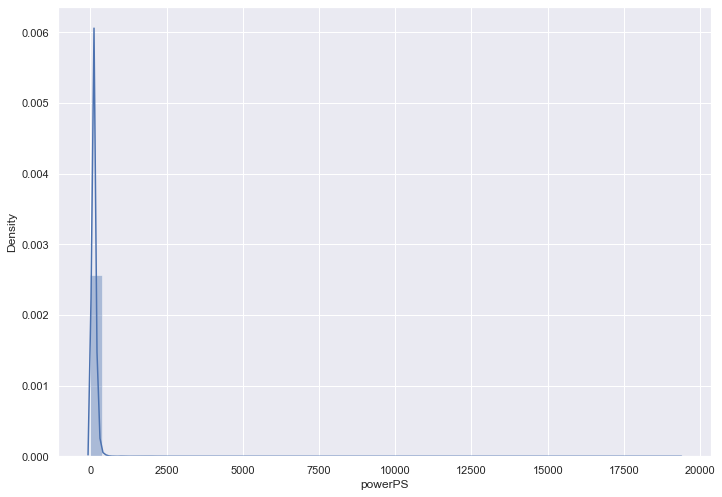

In [32]:
sns.distplot(cars['powerPS'])

<AxesSubplot:ylabel='powerPS'>

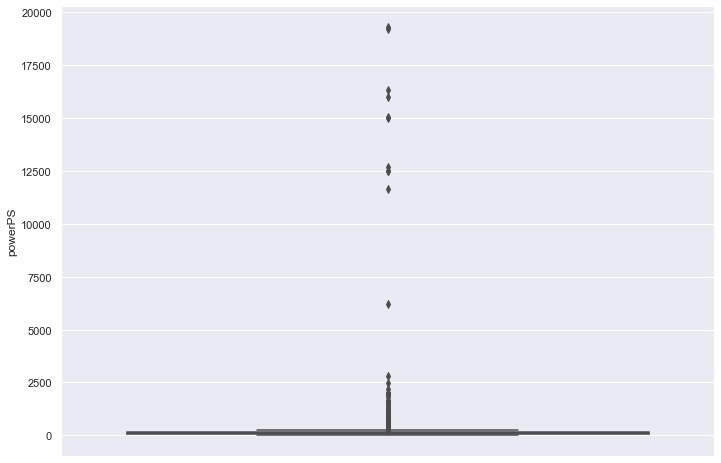

In [33]:
sns.boxplot(y=cars['powerPS'])

<AxesSubplot:xlabel='powerPS', ylabel='price'>

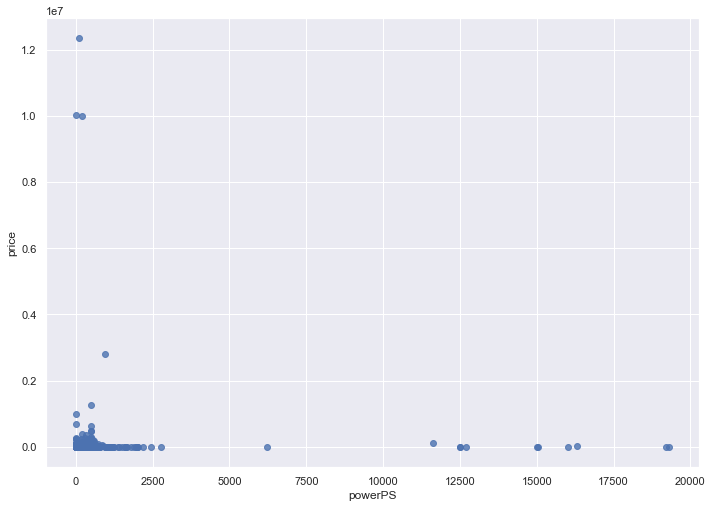

In [34]:
sns.regplot(x='powerPS', y='price', scatter=True, fit_reg=False, data=cars)

In [35]:
sum(cars['powerPS'] > 500)

115

In [36]:
sum(cars['powerPS'] < 10)

5565

Working range- 10-500

In [37]:
# Working range of data

cars = cars[
        (cars.yearOfRegistration <= 2018) 
      & (cars.yearOfRegistration >= 1950) 
      & (cars.price >= 100) 
      & (cars.price <= 150000) 
      & (cars.powerPS >= 10) 
      & (cars.powerPS <= 500)]

## 6759 records are dropped

In [38]:
# Combining yearOfRegistration and monthOfRegistration
# Creating new varible Age by adding yearOfRegistration and monthOfRegistration
cars['monthOfRegistration']/=12
cars['Age']=(2018-cars['yearOfRegistration'])+cars['monthOfRegistration']
cars['Age']=round(cars['Age'],2)
cars['Age'].describe()

count   42772.000
mean       14.873
std         7.093
min         0.000
25%        10.330
50%        14.830
75%        19.170
max        67.750
Name: Age, dtype: float64

In [39]:
# Dropping yearOfRegistration and monthOfRegistration
cars=cars.drop(columns=['yearOfRegistration','monthOfRegistration'], axis=1)

# Visualizing parameters

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

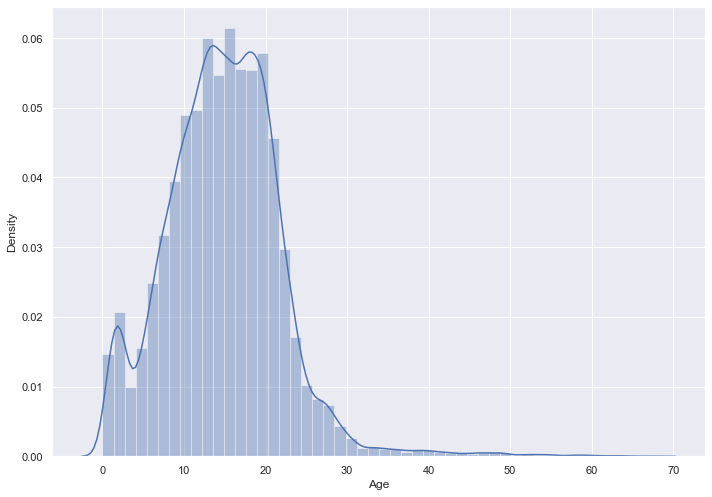

In [40]:
# Age
sns.distplot(cars['Age'])

<AxesSubplot:ylabel='Age'>

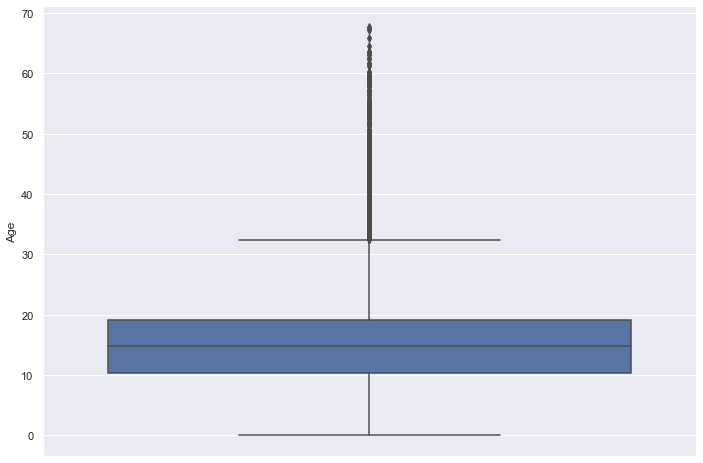

In [41]:
sns.boxplot(y=cars['Age'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

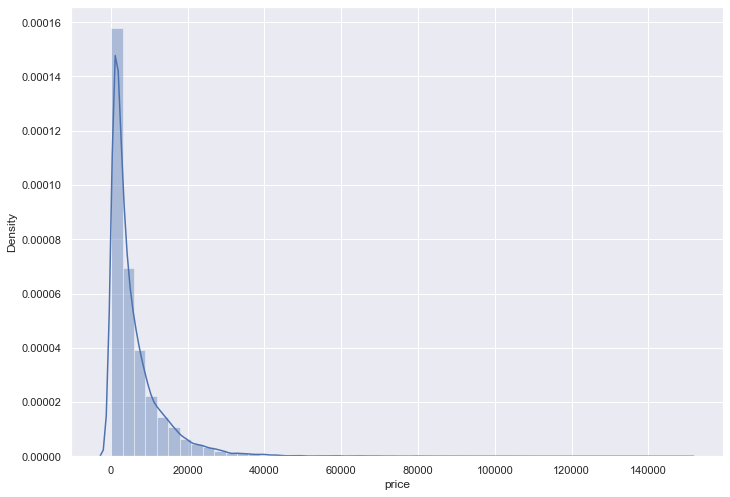

In [42]:
# price
sns.distplot(cars['price'])

<AxesSubplot:ylabel='price'>

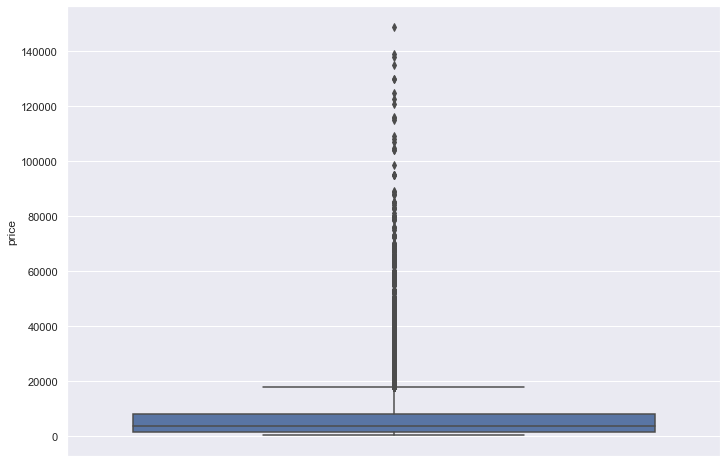

In [43]:
sns.boxplot(y=cars['price'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='powerPS', ylabel='Density'>

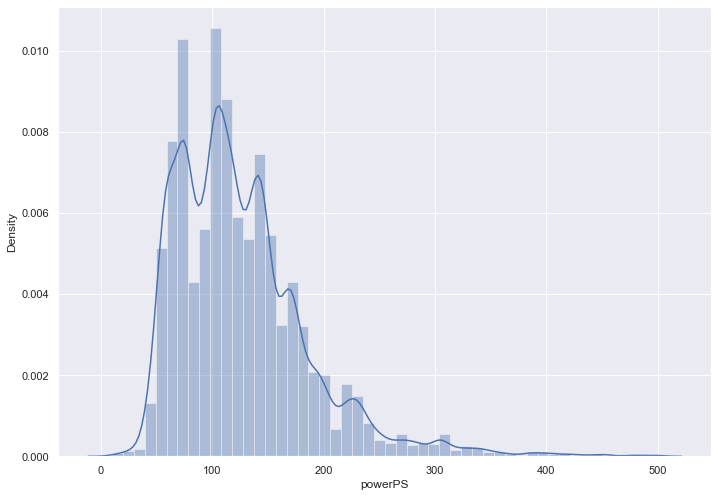

In [44]:
# powerPS
sns.distplot(cars['powerPS'])

<AxesSubplot:ylabel='powerPS'>

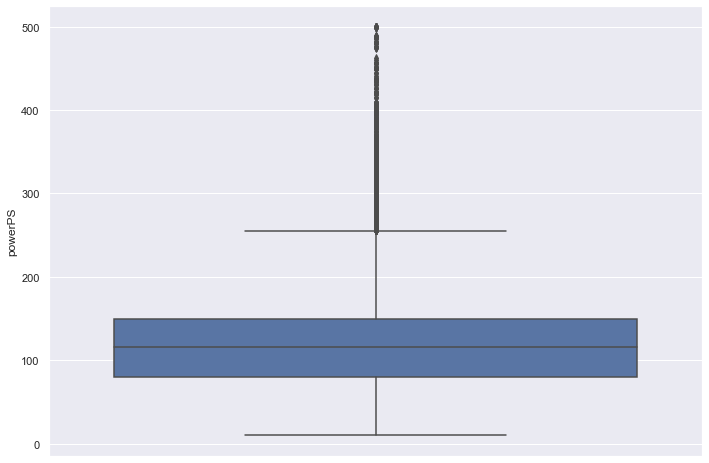

In [45]:
sns.boxplot(y=cars['powerPS'])

<AxesSubplot:xlabel='Age', ylabel='price'>

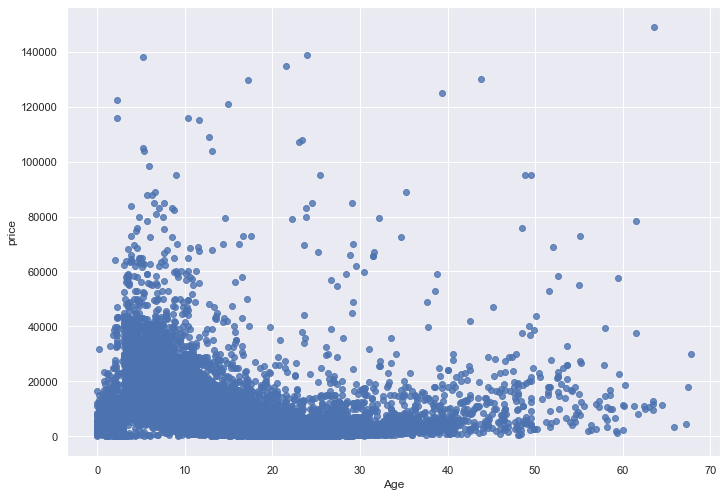

In [46]:
# Visualizing parameters after narrowing working range
# Age vs price
sns.regplot(x='Age', y='price', scatter=True, fit_reg=False, data=cars)
# Cars priced higher are newer
# With increase in age, price decreases
# However some cars are priced higher with increase in age

<AxesSubplot:xlabel='powerPS', ylabel='price'>

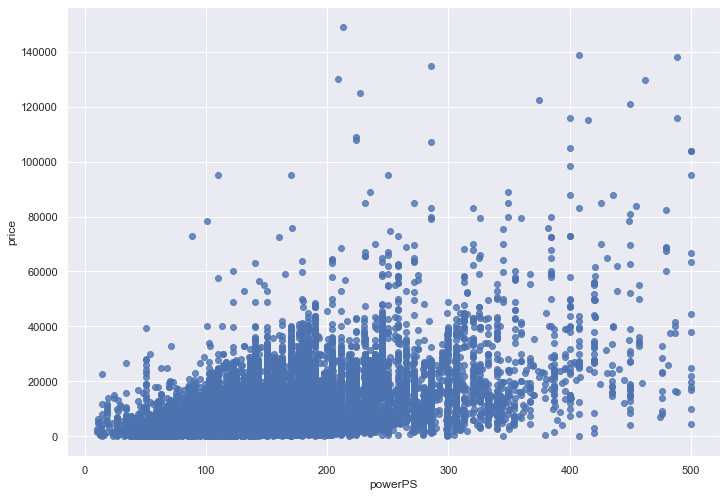

In [47]:
# powerPS vs price
sns.regplot(x='powerPS', y='price', scatter=True, fit_reg=False, data=cars)

In [50]:
# Variable seller
cars['seller'].value_counts()
# Fewer cars have 'commercial'=> Insignificant

private       42771
commercial        1
Name: seller, dtype: int64

In [51]:
pd.crosstab(cars['seller'],columns='count',normalize=True)

col_0,count
seller,
commercial,0.000
private,1.000


<AxesSubplot:xlabel='seller', ylabel='count'>

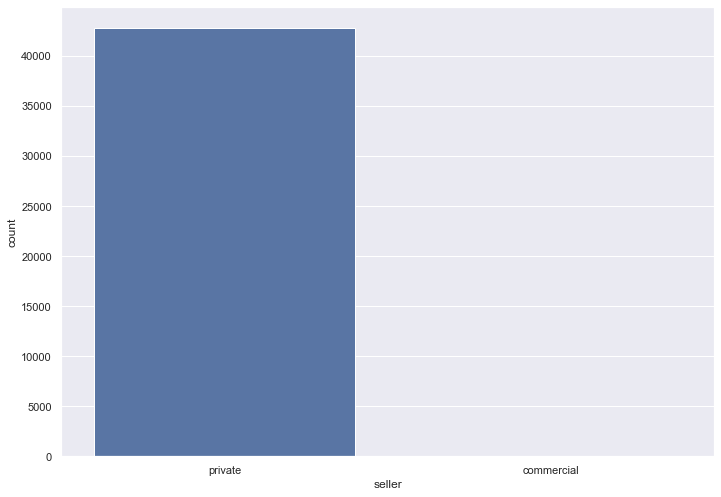

In [52]:
sns.countplot(x= 'seller',data=cars)

In [53]:
# Variable offerType
cars['offerType'].value_counts()
# All cars have 'offer'=> Insignificant

offer    42772
Name: offerType, dtype: int64

<AxesSubplot:xlabel='offerType', ylabel='count'>

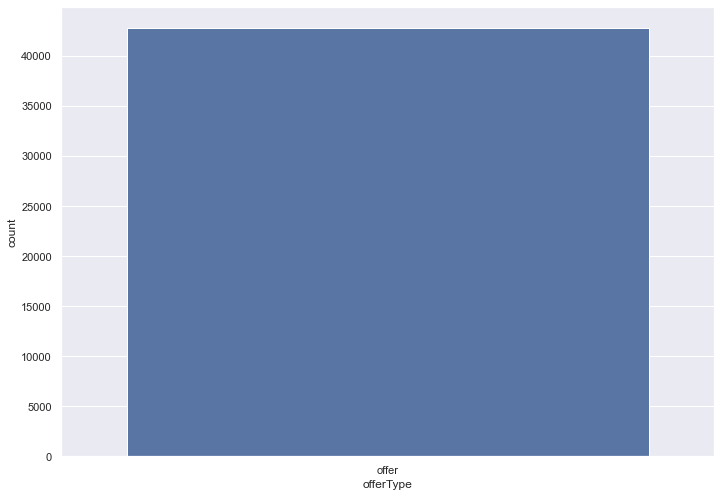

In [54]:
sns.countplot(x= 'offerType',data=cars)

In [55]:
# Variable abtest
cars['abtest'].value_counts()

test       22128
control    20644
Name: abtest, dtype: int64

In [56]:
pd.crosstab(cars['abtest'],columns='count',normalize=True)
# Equally distributed

col_0,count
abtest,
control,0.483
test,0.517


<AxesSubplot:xlabel='abtest', ylabel='count'>

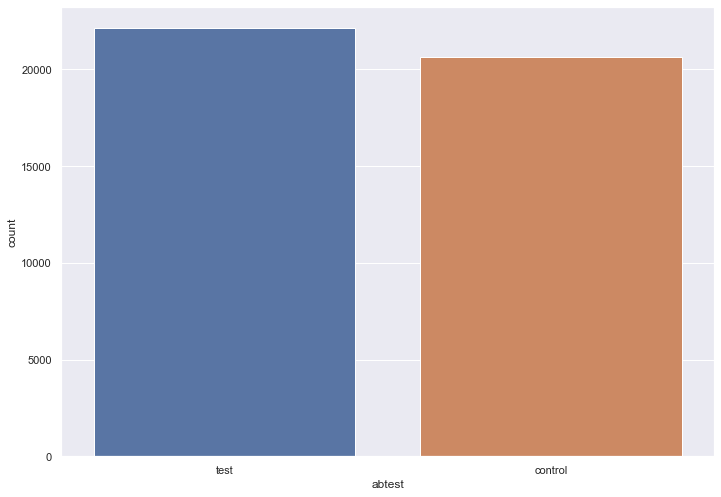

In [57]:
sns.countplot(x= 'abtest',data=cars)
# For every price value there is almost 50-50 distribution

<AxesSubplot:xlabel='abtest', ylabel='price'>

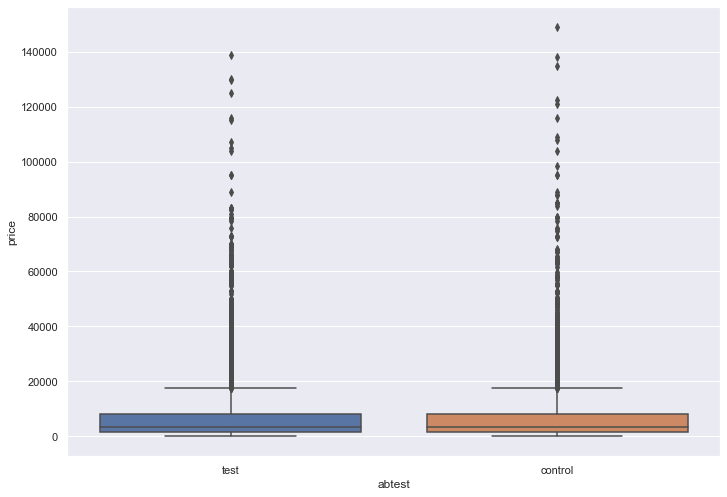

In [58]:
sns.boxplot(x= 'abtest',y='price',data=cars)
# Does not affect price => Insignificant

In [59]:
# Variable vehicleType
cars['vehicleType'].value_counts()
# 8 types- limousine, small cars and station wagons max freq

limousine        11746
small car         9285
station wagon     8076
bus               3597
cabrio            2792
coupe             2261
suv               1813
others             326
Name: vehicleType, dtype: int64

In [60]:
pd.crosstab(cars['vehicleType'],columns='count',normalize=True)

col_0,count
vehicleType,
bus,0.090
cabrio,0.070
coupe,0.057
limousine,0.294
others,0.008
small car,0.233
station wagon,0.202
suv,0.045


<AxesSubplot:xlabel='vehicleType', ylabel='count'>

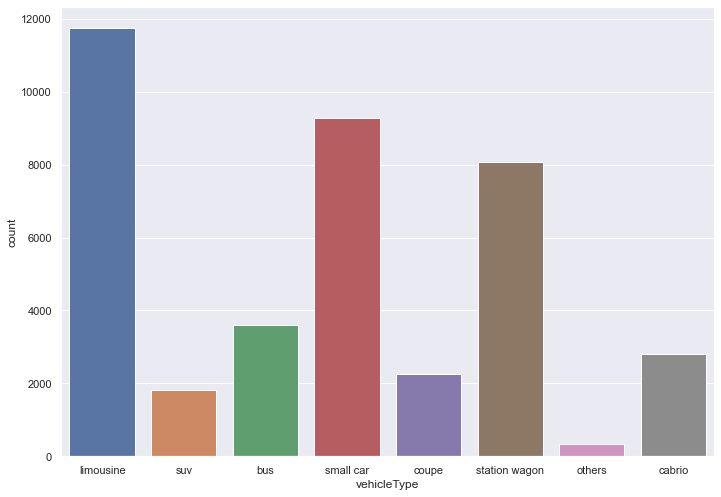

In [61]:
sns.countplot(x= 'vehicleType',data=cars)

<AxesSubplot:xlabel='vehicleType', ylabel='price'>

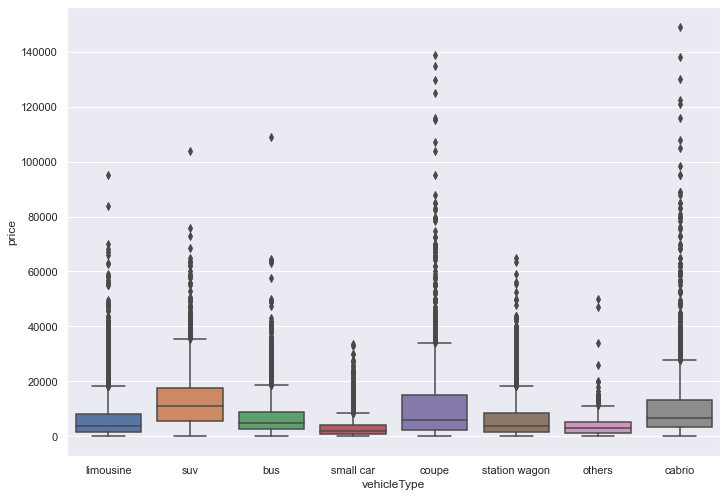

In [62]:
sns.boxplot(x= 'vehicleType',y='price',data=cars)
# vehicleType affects price 

In [63]:
# Variable gearbox
cars['gearbox'].value_counts()

manual       32582
automatic     9396
Name: gearbox, dtype: int64

In [64]:
pd.crosstab(cars['gearbox'],columns='count',normalize=True)

col_0,count
gearbox,
automatic,0.224
manual,0.776


<AxesSubplot:xlabel='gearbox', ylabel='count'>

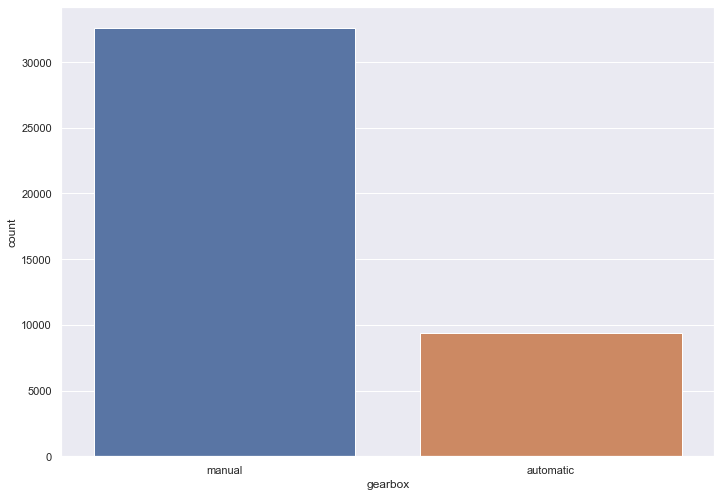

In [65]:
sns.countplot(x= 'gearbox',data=cars)

<AxesSubplot:xlabel='gearbox', ylabel='price'>

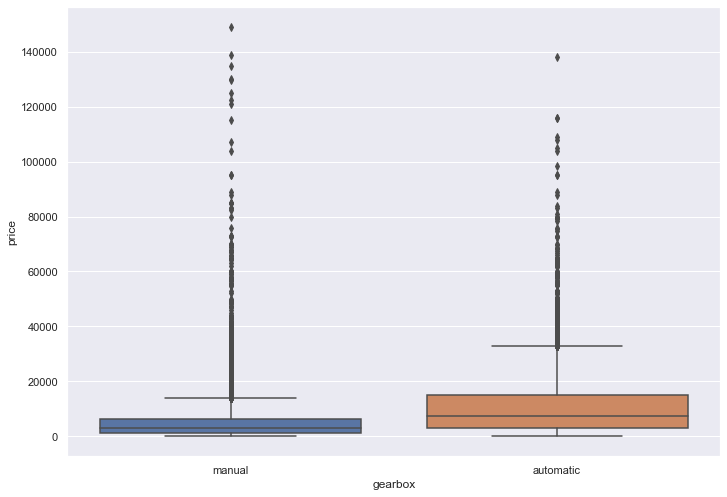

In [66]:
sns.boxplot(x= 'gearbox',y='price',data=cars)
# gearbox affects price 

In [67]:
# Variable model
cars['model'].value_counts()

golf          3478
others        2900
3er           2482
polo          1500
corsa         1386
              ... 
b_max            1
serie_3          1
elefantino       1
charade          1
rangerover       1
Name: model, Length: 247, dtype: int64

In [68]:
pd.crosstab(cars['model'],columns='count',normalize=True)

col_0,count
model,
100,0.001
145,0.000
147,0.001
156,0.002
159,0.000
...,...
yaris,0.003
yeti,0.001
ypsilon,0.001


<AxesSubplot:xlabel='model', ylabel='count'>

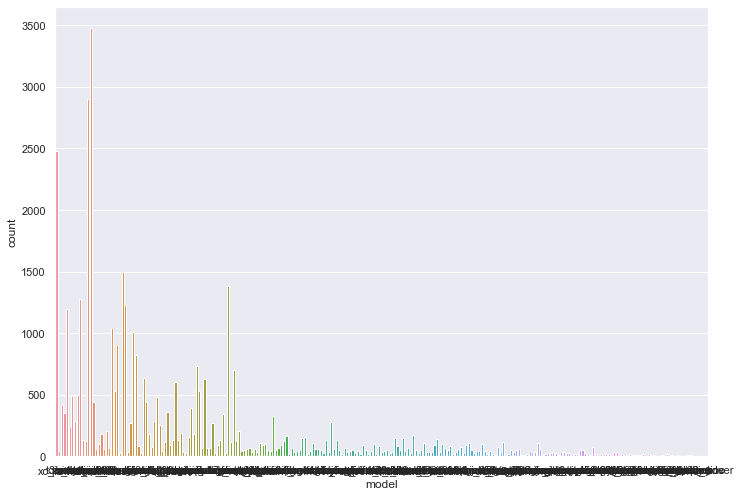

In [69]:
sns.countplot(x= 'model',data=cars)

<AxesSubplot:xlabel='price', ylabel='model'>

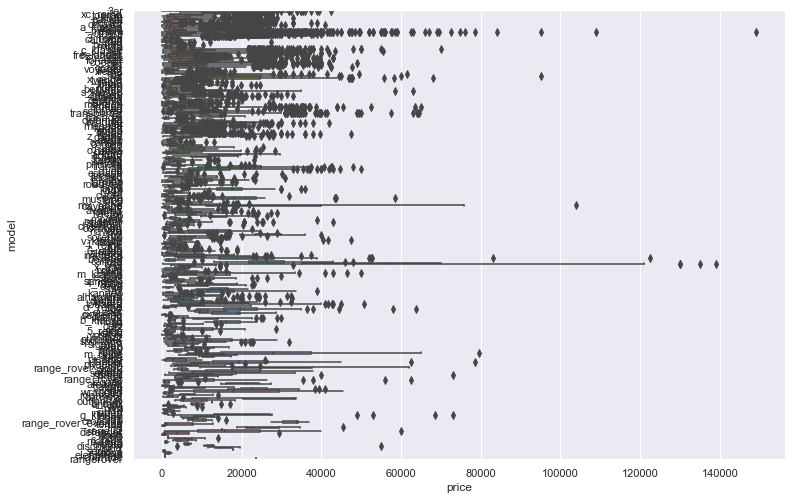

In [70]:
sns.boxplot(y= 'model',x='price',data=cars)
# Cars are distributed over many models
# Considered in modelling

In [71]:
# Variable kilometer
cars['kilometer'].value_counts().sort_index()

5000        479
10000       207
20000       651
30000       712
40000       795
50000       932
60000      1101
70000      1182
80000      1378
90000      1484
100000     1824
125000     4597
150000    27430
Name: kilometer, dtype: int64

In [72]:
cars['kilometer'].describe()

count    42772.000
mean    125815.253
std      39078.120
min       5000.000
25%     100000.000
50%     150000.000
75%     150000.000
max     150000.000
Name: kilometer, dtype: float64

In [73]:
pd.crosstab(cars['kilometer'],columns='count',normalize=True)

col_0,count
kilometer,
5000,0.011
10000,0.005
20000,0.015
30000,0.017
40000,0.019
50000,0.022
60000,0.026
70000,0.028
80000,0.032


<AxesSubplot:xlabel='kilometer', ylabel='price'>

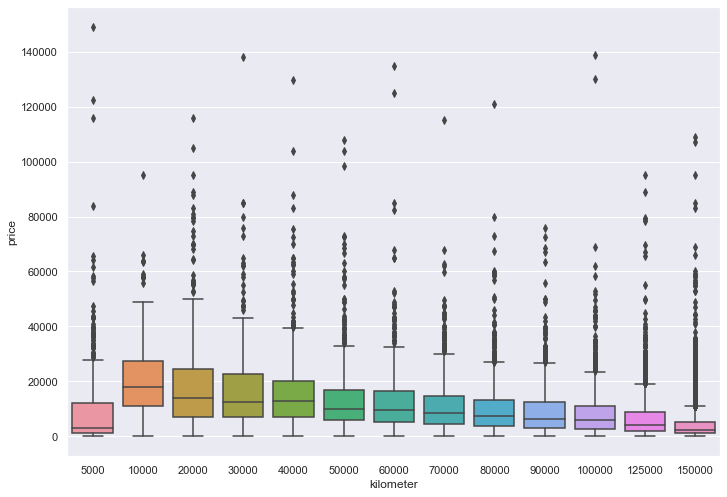

In [74]:
sns.boxplot(x= 'kilometer',y='price',data=cars)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='kilometer'>

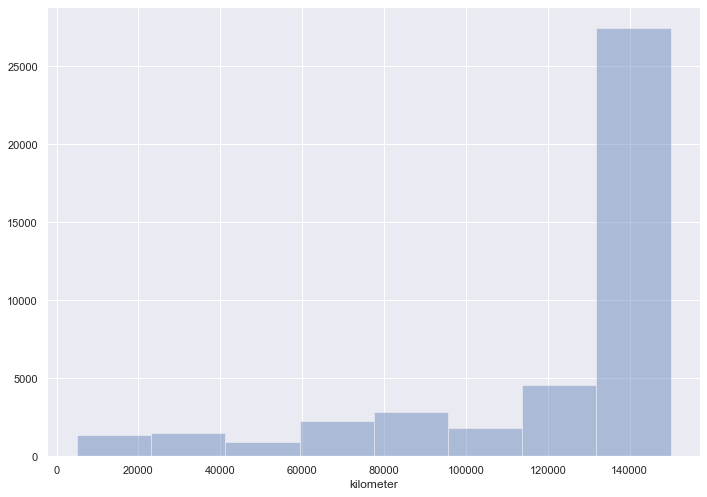

In [75]:
sns.distplot(cars['kilometer'],bins=8 ,kde=False)

<AxesSubplot:xlabel='kilometer', ylabel='price'>

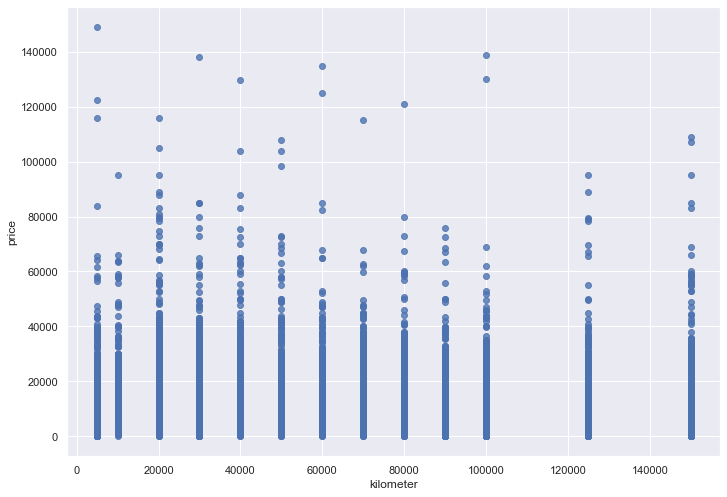

In [76]:
sns.regplot(x='kilometer', y='price', scatter=True,fit_reg=False, data=cars)
# Considered in modelling

In [77]:
# Variable fuelType
cars['fuelType'].value_counts()

petrol     26509
diesel     12854
lpg          690
cng           70
hybrid        36
electro       10
other          6
Name: fuelType, dtype: int64

In [78]:
pd.crosstab(cars['fuelType'],columns='count',normalize=True)

col_0,count
fuelType,
cng,0.002
diesel,0.320
electro,0.000
hybrid,0.001
lpg,0.017
other,0.000
petrol,0.660


<AxesSubplot:xlabel='fuelType', ylabel='count'>

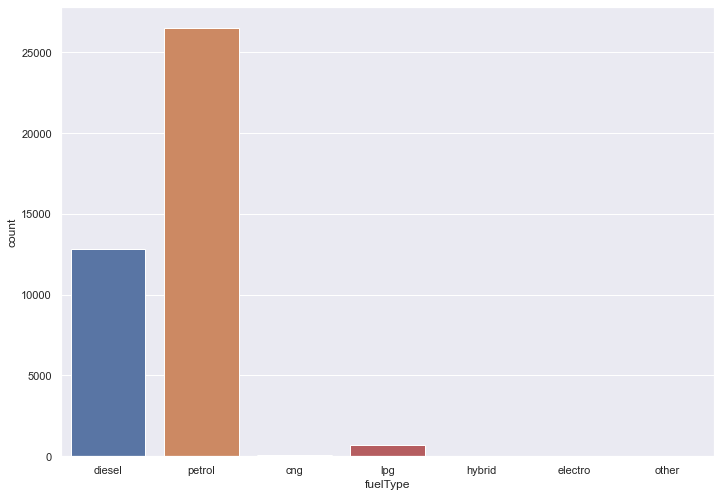

In [79]:
sns.countplot(x= 'fuelType',data=cars)

<AxesSubplot:xlabel='fuelType', ylabel='price'>

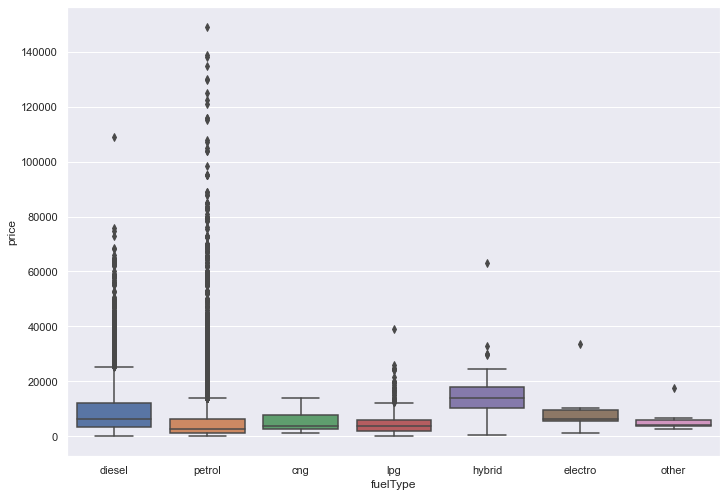

In [80]:
sns.boxplot(x= 'fuelType',y='price',data=cars)
# fuelType affects price

In [81]:
# Variable brand
cars['brand'].value_counts()

volkswagen        9134
bmw               4868
opel              4487
mercedes_benz     4134
audi              3984
ford              2815
renault           1941
peugeot           1323
fiat               996
seat               886
skoda              698
mazda              663
smart              623
nissan             601
citroen            598
toyota             547
volvo              429
mini               428
hyundai            406
mitsubishi         359
honda              300
sonstige_autos     299
kia                276
suzuki             264
porsche            260
alfa_romeo         245
chevrolet          213
chrysler           151
dacia              123
subaru             112
jeep                91
land_rover          81
jaguar              78
daihatsu            67
saab                65
lancia              56
rover               53
daewoo              53
trabant             43
lada                22
Name: brand, dtype: int64

In [82]:
pd.crosstab(cars['brand'],columns='count',normalize=True)

col_0,count
brand,
alfa_romeo,0.006
audi,0.093
bmw,0.114
chevrolet,0.005
chrysler,0.004
citroen,0.014
dacia,0.003
daewoo,0.001
daihatsu,0.002


<AxesSubplot:xlabel='brand', ylabel='count'>

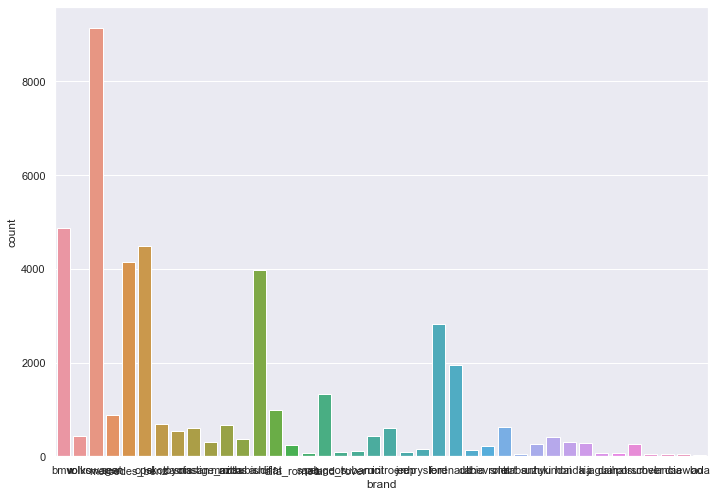

In [83]:
sns.countplot(x= 'brand',data=cars)

<AxesSubplot:xlabel='price', ylabel='brand'>

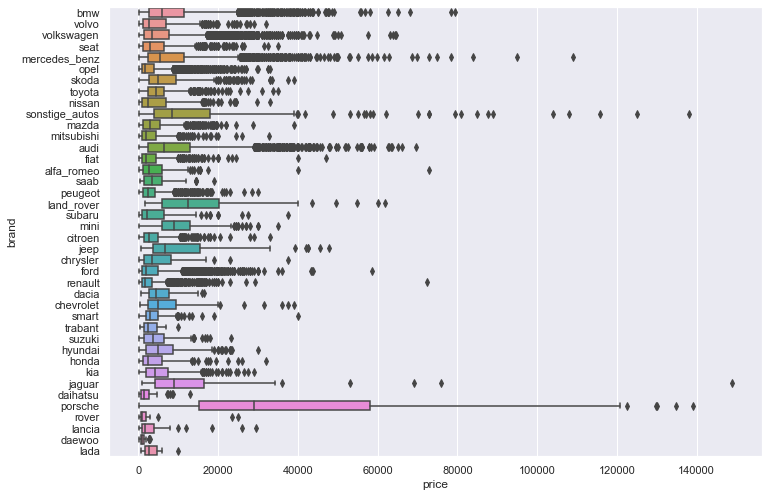

In [84]:
sns.boxplot(y= 'brand',x='price',data=cars)
# Cars are distributed over many brands
# Considered for modelling

In [85]:
# Variable notRepairedDamage
# yes- car is damaged but not rectified
# no- car was damaged but has been rectified
cars['notRepairedDamage'].value_counts()

no     32507
yes     3988
Name: notRepairedDamage, dtype: int64

In [86]:
pd.crosstab(cars['notRepairedDamage'],columns='count',normalize=True)

col_0,count
notRepairedDamage,
no,0.891
yes,0.109


<AxesSubplot:xlabel='notRepairedDamage', ylabel='count'>

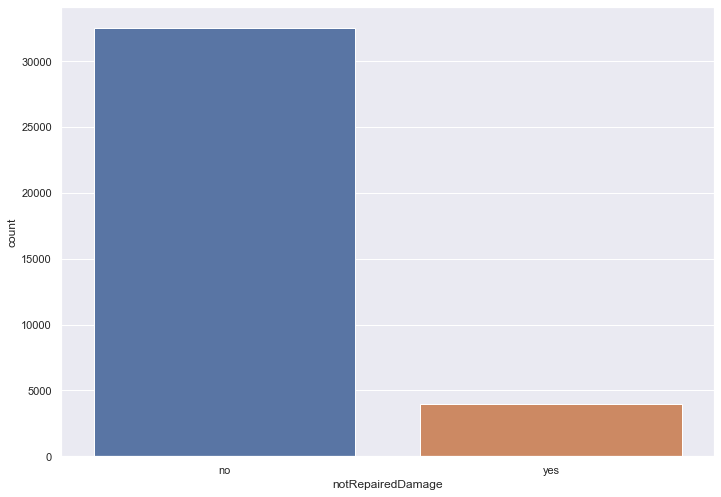

In [87]:
sns.countplot(x= 'notRepairedDamage',data=cars)

<AxesSubplot:xlabel='notRepairedDamage', ylabel='price'>

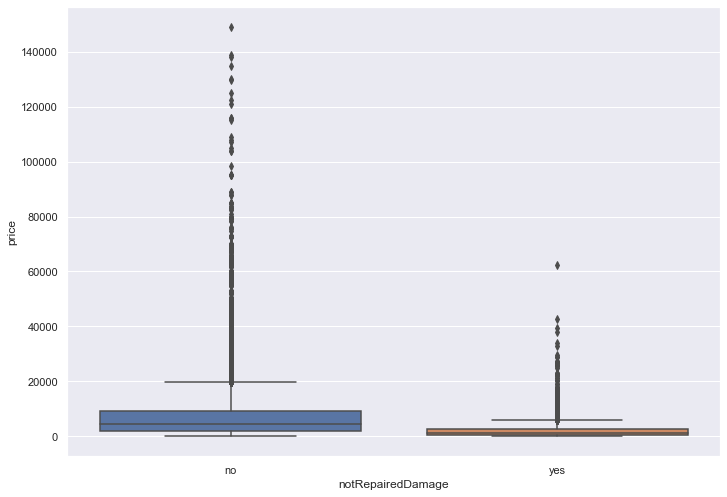

In [88]:
sns.boxplot(x= 'notRepairedDamage',y='price',data=cars)
# As expected, the cars that require the damages to be repaired
# fall under lower price ranges

In [89]:
# Removing insignificant variables
col=['seller','offerType','abtest']
cars=cars.drop(columns=col, axis=1)
cars_copy=cars.copy()

In [93]:
# Correlation
correlation=cars.corr()
correlation

,price,powerPS,kilometer,Age
price,1.000,0.575,-0.440,-0.336
powerPS,0.575,1.000,-0.016,-0.151
kilometer,-0.440,-0.016,1.000,0.292
Age,-0.336,-0.151,0.292,1.000


In [94]:
round(correlation,3)   
cars.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]

powerPS     0.575
kilometer   0.440
Age         0.336
Name: price, dtype: float64

We are going to build a Linear Regression and Random Forest model
on two sets of data.
1. Data obtained by omitting rows with any missing value
2. Data obtained by imputing the missing values 

# OMITTING MISSING VALUES

In [95]:
cars_omit=cars.dropna(axis=0)

# Converting categorical variables to dummy variables
cars_omit=pd.get_dummies(cars_omit,drop_first=True)

In [97]:
# IMPORTING NECESSARY LIBRARIES
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# MODEL BUILDING WITH OMITTED DATA

In [98]:
# Separating input and output features
x1 = cars_omit.drop(['price'], axis='columns', inplace=False)
y1 = cars_omit['price']

array([[<AxesSubplot:title={'center':'1. Before'}>,
        <AxesSubplot:title={'center':'2. After'}>]], dtype=object)

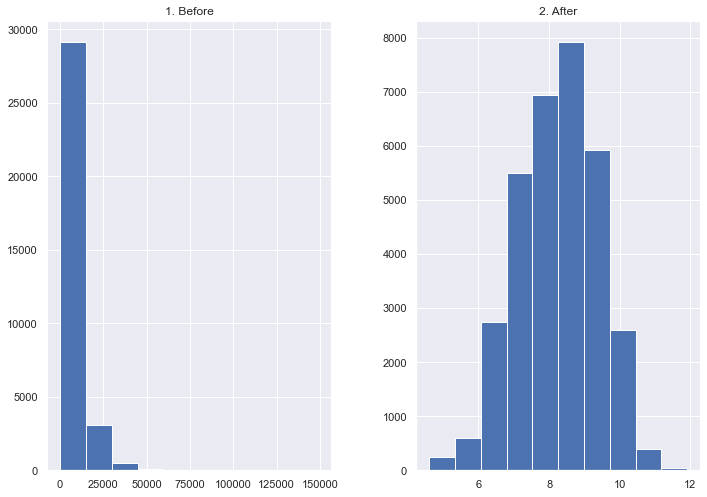

In [99]:
# Plotting the variable price
prices = pd.DataFrame({"1. Before":y1, "2. After":np.log(y1)})
prices.hist()

In [100]:
# Transforming price as a logarithmic value
y1 = np.log(y1)

In [101]:
# Splitting data into test and train
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state = 3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(23018, 300) (9866, 300) (23018,) (9866,)


# BASELINE MODEL FOR OMITTED DATA

We are making a base model by using test data mean value.
This is to set a benchmark and to compare with our regression model

In [102]:
# finding the mean for test data value
base_pred = np.mean(y_test)
print(base_pred)

8.249615787653337


In [103]:
# Repeating same value till length of test data
base_pred = np.repeat(base_pred, len(y_test))

In [104]:
# finding the RMSE
base_root_mean_square_error = np.sqrt(mean_squared_error(y_test, base_pred))
print(base_root_mean_square_error)

1.1274483657478247


# LINEAR REGRESSION WITH OMITTED DATA

In [105]:
# Setting intercept as true
lgr=LinearRegression(fit_intercept=True)

In [106]:
# Model
model_lin1=lgr.fit(X_train,y_train)

In [107]:
# Predicting model on test set
cars_predictions_lin1 = lgr.predict(X_test)

In [108]:
# Computing MSE and RMSE
lin_mse1 = mean_squared_error(y_test, cars_predictions_lin1)
lin_rmse1 = np.sqrt(lin_mse1)
print(lin_rmse1)

0.5455481266513819


In [109]:
# R squared value
r2_lin_test1=model_lin1.score(X_test,y_test)
r2_lin_train1=model_lin1.score(X_train,y_train)
print(r2_lin_test1,r2_lin_train1)

0.7658615091649262 0.7800936978183916


count   9866.000
mean       0.003
std        0.546
min       -5.796
25%       -0.261
50%        0.041
75%        0.302
max        4.547
Name: price, dtype: float64

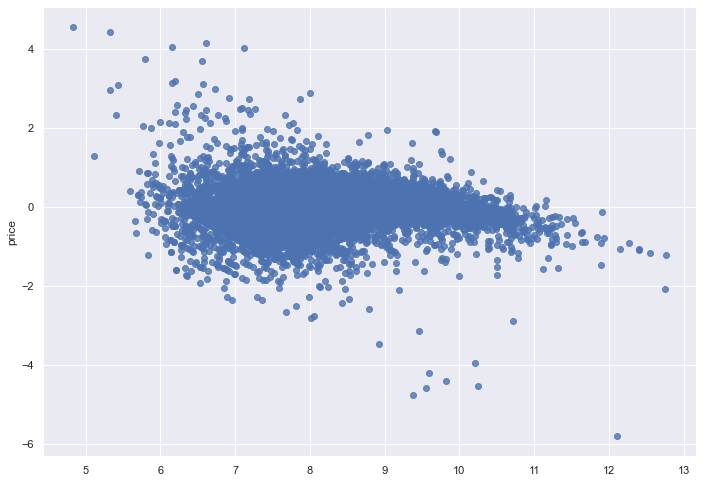

In [110]:
# Regression diagnostics- Residual plot analysis
residuals1=y_test-cars_predictions_lin1
sns.regplot(x=cars_predictions_lin1, y=residuals1, scatter=True,fit_reg=False)
residuals1.describe()

# RANDOM FOREST WITH OMITTED DATA

In [111]:
# Model parameters
rf = RandomForestRegressor(n_estimators = 100,max_features='auto',max_depth=100,min_samples_split=10,min_samples_leaf=4,random_state=1)

In [112]:
# Model
model_rf1=rf.fit(X_train,y_train)

In [113]:
# Predicting model on test set
cars_predictions_rf1 = rf.predict(X_test)

In [114]:
# Computing MSE and RMSE
rf_mse1 = mean_squared_error(y_test, cars_predictions_rf1)
rf_rmse1 = np.sqrt(rf_mse1)
print(rf_rmse1)

0.4360736289370223


In [115]:
# R squared value
r2_rf_test1=model_rf1.score(X_test,y_test)
r2_rf_train1=model_rf1.score(X_train,y_train)
print(r2_rf_test1,r2_rf_train1)

0.8504018147750623 0.9202494705146291


# MODEL BUILDING WITH IMPUTED DATA

In [116]:
cars_imputed = cars.apply(lambda x:x.fillna(x.median()) \
                  if x.dtype=='float' else \
                  x.fillna(x.value_counts().index[0]))

In [117]:
cars_imputed.isnull().sum()

price                0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
Age                  0
dtype: int64

In [118]:
# Converting categorical variables to dummy variables
cars_imputed=pd.get_dummies(cars_imputed,drop_first=True)

In [119]:
# Separating input and output feature
x2 = cars_imputed.drop(['price'], axis='columns', inplace=False)
y2 = cars_imputed['price']

array([[<AxesSubplot:title={'center':'1. Before'}>,
        <AxesSubplot:title={'center':'2. After'}>]], dtype=object)

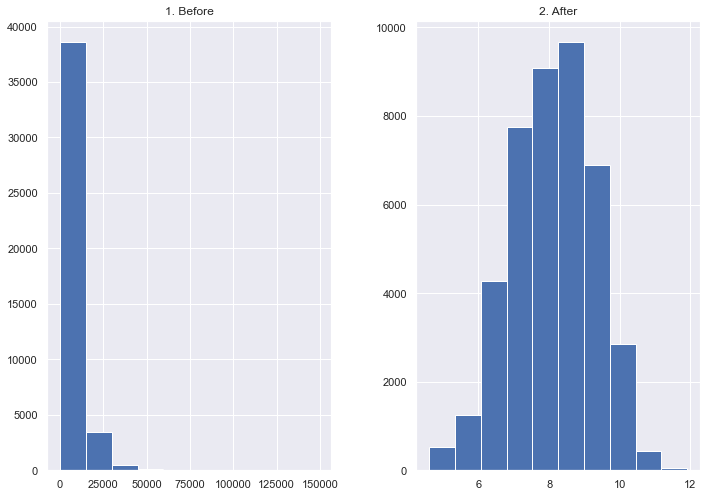

In [120]:
# Plotting the variable price
prices = pd.DataFrame({"1. Before":y2, "2. After":np.log(y2)})
prices.hist()

In [121]:
# Transforming price as a logarithmic value
y2 = np.log(y2)

In [122]:
# Splitting data into test and train
X_train1, X_test1, y_train1, y_test1 = train_test_split(x2, y2, test_size=0.3, random_state = 3)
print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)

(29940, 303) (12832, 303) (29940,) (12832,)


# BASELINE MODEL FOR IMPUTED DATA

We are making a base model by using test data mean value.
This is to set a benchmark and to compare with our regression mode

In [123]:
# finding the mean for test data value
base_pred = np.mean(y_test1)
print(base_pred)

8.068391740519193


In [124]:
# Repeating same value till length of test data
base_pred = np.repeat(base_pred, len(y_test1))

In [125]:
# finding the RMSE
base_root_mean_square_error_imputed = np.sqrt(mean_squared_error(y_test1, base_pred))
print(base_root_mean_square_error_imputed)

1.1884349112889792


# LINEAR REGRESSION WITH IMPUTED DATA

In [126]:
# Setting intercept as true
lgr2=LinearRegression(fit_intercept=True)

In [127]:
# Model
model_lin2=lgr2.fit(X_train1,y_train1)

In [128]:
# Predicting model on test set
cars_predictions_lin2 = lgr2.predict(X_test1)

In [129]:
# Computing MSE and RMSE
lin_mse2 = mean_squared_error(y_test1, cars_predictions_lin2)
lin_rmse2 = np.sqrt(lin_mse2)
print(lin_rmse2)

0.6483956449231298


In [130]:
# R squared value
r2_lin_test2=model_lin2.score(X_test1,y_test1)
r2_lin_train2=model_lin2.score(X_train1,y_train1)
print(r2_lin_test2,r2_lin_train2)

0.7023339008631182 0.7071658736894363


# RANDOM FOREST WITH IMPUTED DATA

In [131]:
# Model parameters
rf2 = RandomForestRegressor(n_estimators = 100,max_features='auto',max_depth=100,min_samples_split=10, min_samples_leaf=4,random_state=1)

In [132]:
# Model
model_rf2=rf2.fit(X_train1,y_train1)

In [133]:
# Predicting model on test set
cars_predictions_rf2 = rf2.predict(X_test1)

In [134]:
# Computing MSE and RMSE
rf_mse2 = mean_squared_error(y_test1, cars_predictions_rf2)
rf_rmse2 = np.sqrt(rf_mse2)
print(rf_rmse2)

0.494313994408829


In [135]:
# R squared value
r2_rf_test2=model_rf2.score(X_test1,y_test1)
r2_rf_train2=model_rf2.score(X_train1,y_train1)
print(r2_rf_test2,r2_rf_train2) 

0.8269964521311131 0.9024289431669166


# Final output

In [136]:
print("Metrics for models built from data where missing values were omitted")
print("R squared value for train from Linear Regression=  %s"% r2_lin_train1)
print("R squared value for test from Linear Regression=  %s"% r2_lin_test1)
print("R squared value for train from Random Forest=  %s"% r2_rf_train1)
print("R squared value for test from Random Forest=  %s"% r2_rf_test1)
print("Base RMSE of model built from data where missing values were omitted= %s"%base_root_mean_square_error)
print("RMSE value for test from Linear Regression=  %s"% lin_rmse1)
print("RMSE value for test from Random Forest=  %s"% rf_rmse1)

Metrics for models built from data where missing values were omitted
R squared value for train from Linear Regression=  0.7800936978183916
R squared value for test from Linear Regression=  0.7658615091649262
R squared value for train from Random Forest=  0.9202494705146291
R squared value for test from Random Forest=  0.8504018147750623
Base RMSE of model built from data where missing values were omitted= 1.1274483657478247
RMSE value for test from Linear Regression=  0.5455481266513819
RMSE value for test from Random Forest=  0.4360736289370223


In [137]:
print("Metrics for models built from data where missing values were imputed")
print("R squared value for train from Linear Regression=  %s"% r2_lin_train2)
print("R squared value for test from Linear Regression=  %s"% r2_lin_test2)
print("R squared value for train from Random Forest=  %s"% r2_rf_train2)
print("R squared value for test from Random Forest=  %s"% r2_rf_test2)
print("Base RMSE of model built from data where missing values were imputed= %s"%base_root_mean_square_error_imputed)
print("RMSE value for test from Linear Regression=  %s"% lin_rmse2)
print("RMSE value for test from Random Forest=  %s"% rf_rmse2)

Metrics for models built from data where missing values were imputed
R squared value for train from Linear Regression=  0.7071658736894363
R squared value for test from Linear Regression=  0.7023339008631182
R squared value for train from Random Forest=  0.9024289431669166
R squared value for test from Random Forest=  0.8269964521311131
Base RMSE of model built from data where missing values were imputed= 1.1884349112889792
RMSE value for test from Linear Regression=  0.6483956449231298
RMSE value for test from Random Forest=  0.494313994408829


# END OF THE SCRIPT